In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta

In [2]:
### All variables should go here

COLUMN_TO_PLOT='m03' # Header value for the column you want to graph
COMET='2002 data of 96P/Machholz 1' # Title to put in Graph
DATA_FILE_1='mpc_96P_2002.txt' # The Minor Planet Center data file
DATA_FILE_2='soho96P_Machholz1_2002_clear_photom.dat' # The SOHO data file
MAX_MAG=20 # Adjust the Y-Axis for max magnitude
MIN_MAG=0 # Adjust the Y-Axis for min magnitude
XLABEL='Date'
XROT=35 # Number of degrees to rotate the tick labels
XSTEPS=20 # This is the number of ticks on the X axis
YLABEL='Magnitude'


In [3]:
# Enable LaTeX text rendering and 300 DPI
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "figure.dpi": "300",
})

In [4]:
# Read the first data file
df1 = pd.read_csv(DATA_FILE_1, sep='\s+', header=None, usecols=[1, 2, 3, 10], names=['Year', 'Month', 'Day', 'Magnitude'])

In [5]:
# Remove any preceding characters from the year column and convert to string
df1['Year'] = df1['Year'].str.replace(r'\D+', '', regex=True).astype(str)

# Convert Month and Day columns to string and zero-pad if necessary
df1['Month'] = df1['Month'].astype(str).str.zfill(2)
df1['Day'] = df1['Day'].astype(str).str.zfill(2)

# Combine columns to create a datetime column
df1['DateTime'] = pd.to_datetime(df1['Year'] + df1['Month'] + df1['Day'], format='%Y%m%d.%f')

# Convert datetime column back to string
#df1['DateTime'] = df1['DateTime'].dt.strftime('%Y%m%d.%f')

# Convert the 'DateTime' column to datetime objects
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format='%Y-%m-%d', errors='coerce')

# Convert Magnitude column to numeric, handling non-numeric values by setting them to NaN
df1['Magnitude'] = pd.to_numeric(df1['Magnitude'], errors='coerce')

# Remove rows with NaN values in Magnitude column
df1 = df1.dropna(subset=['Magnitude'])

# Remove rows with NaT values in DateTime column
df1 = df1.dropna(subset=['DateTime'])


In [6]:
# Read the second data file
df2 = pd.read_csv(DATA_FILE_2, sep='\s+')

In [7]:
# Combine date and time
df2['DateTime'] = pd.to_datetime(df2['Date'] + ' ' + df2['Time'])

# Convert the 'DateTime' column to datetime data type with a specified format
df2['DateTime'] = pd.to_datetime(df2['DateTime'], format='%Y-%m-%d')

# Remove rows with NaT values in DateTime column
df2 = df2.dropna(subset=['DateTime'])

# Choose which column to graph based on the column header
column_to_plot = COLUMN_TO_PLOT  # Change this to plot different columns in the variable section

# Remove rows with NaN values in column_to_plot column
df2 = df2.dropna(subset=[column_to_plot])

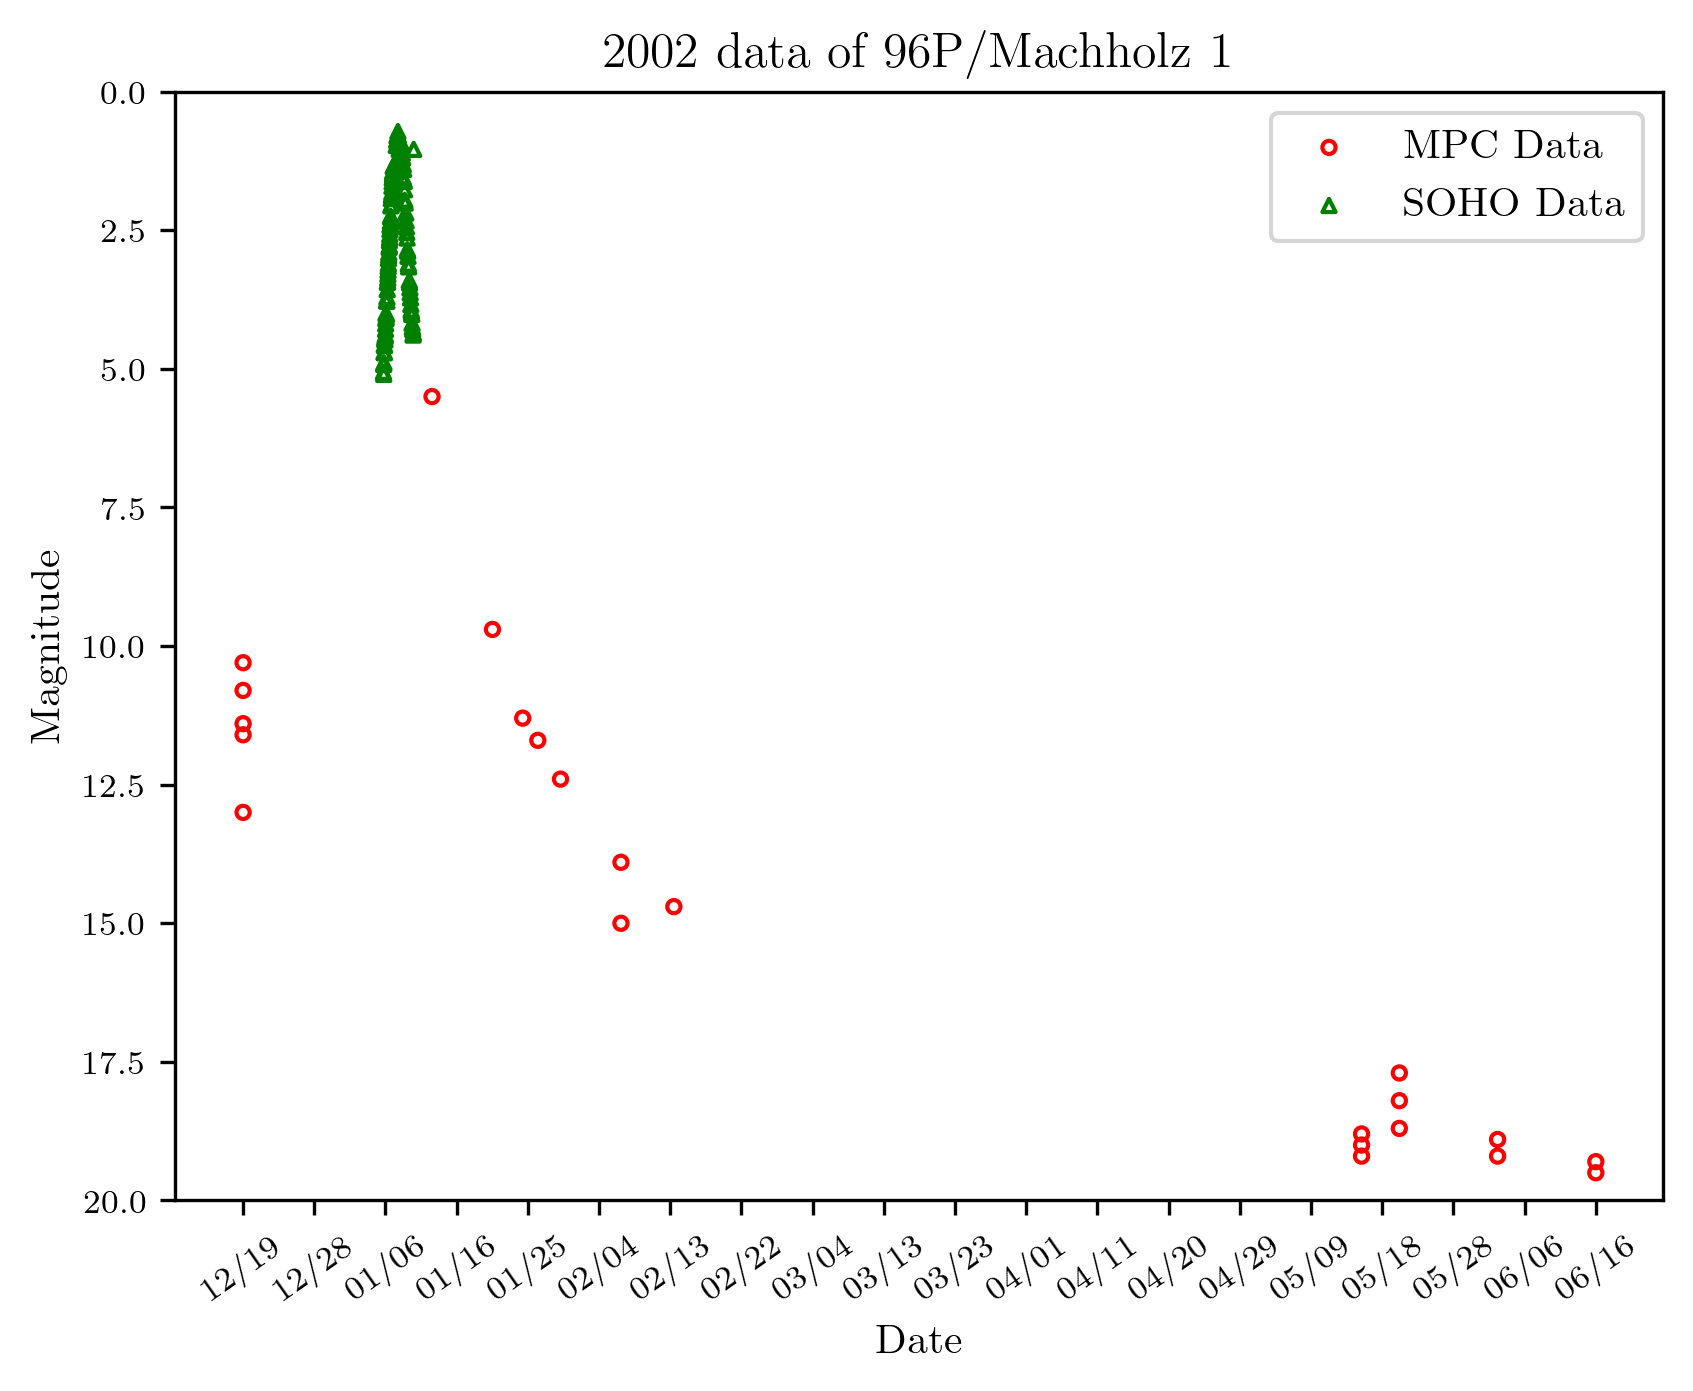

In [8]:
# Select relevant columns from df1 and df2
df1_selected = df1[['DateTime', 'Magnitude']]
df2_selected = df2[['DateTime', column_to_plot]]

# Combine the columns from the two data file into a new thrid data object
df3 = pd.concat([df1_selected, df2_selected], ignore_index=True)

# Sort the merged DataFrame by DateTime
#df3.sort_values('DateTime', inplace=True)

# Format the date strings for df3
date_labels_df3 = df3['DateTime'].dt.strftime('%m/%d')

# Calculate the range of dates in the df3 dataset
date_range = df3['DateTime'].max() - df3['DateTime'].min()

# Calculate the step size for each tick based on XSTEPS
step_size = date_range / (XSTEPS - 1)

# Generate the tick positions
tick_positions = [df3['DateTime'].min() + step_size * i for i in range(XSTEPS)]

# Generate the tick labels
tick_labels = [date.strftime('%m/%d') for date in tick_positions]

# Set the x-axis ticks and labels
plt.xticks(tick_positions, tick_labels, rotation=XROT)

# Set the y-axis limits manually
plt.ylim(MIN_MAG, MAX_MAG)  # Adjust the limits as needed

# Scatter plot for df3, specifying marker and color for each dataset
plt.scatter(df3['DateTime'], df3['Magnitude'], label='MPC Data', s=10, edgecolor='red', marker='o', facecolor='none')
plt.scatter(df3['DateTime'], df3[column_to_plot], label='SOHO Data', s=10, edgecolor='green', marker='^', facecolor='none')

# Add labels for the x and y axes
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)

# Add title
plt.title(COMET)

# Change the font size of tick labels
plt.xticks(fontsize=8)  # Adjust the font size as needed
plt.yticks(fontsize=8)  # Adjust the font size as needed

# Invert the Y-axis
plt.gca().invert_yaxis()

plt.legend()
plt.show()